# Modules

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches

# Animation function

In [20]:
def anime(frames, title): 

   # let's prepare simulation

    fig = plt.figure()
    ax = plt.axes()
    im = ax.imshow(frames[0])
    ax.set_title("b = 1.9, time = 0")

    def init():
        im.set_data(frames[0])
        return [im]

    def animate(i):
                
        cmap = plt.cm.colors.ListedColormap(['red', 'blue', 'green'])
        bounds = [-1.5, -0.5, 0.5, 1.5]
        norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
        
        im = ax.imshow(frames[i], cmap = cmap, norm = norm)
        fish = np.count_nonzero(frames[i] == 1)
        sharks = np.count_nonzero(frames[i] == -1)
        ax.set_title("day = {}\nNo. of sharks = {} No. of fish = {}".format(4*i, sharks, fish))
        ax.tick_params(labelleft = False, labelbottom = False, bottom = False, left = False)
        labels = ['Shark', 'Water', 'Fish']
        handles = [mpatches.Patch(color=cmap(norm(float(i)))) for i in [-1,0,1]]        
        plt.legend(handles, labels, loc = "upper left", bbox_to_anchor = [1, 0.62])
        return [im]

    # create and save animation to file

    animation = FuncAnimation(fig, animate, frames = len(frames))
    animation.save(title)

# Hyperparameters

In [21]:
children_time = 3
shark_children_time = 20
size = 200
fish_num = 3000
shark_num = 100
initial_energy = 3
time = 800

# Fish

In [22]:
# moves

#moves = [np.array([1,0]), np.array([1,1]), np.array([0,1]), np.array([-1,1]), np.array([-1,0]), np.array([-1,-1]), np.array([0,-1]), np.array([1,-1])]
moves = [np.array([1,0]), np.array([0,1]), np.array([-1,0]), np.array([0,-1])]

# initiate ocean with fish

ocean = np.empty([size, size])

prob = fish_num/(size**2)
for x in range(size):
    for y in range(size):
        ocean[x, y] = np.random.choice([0, 1], p = [1-prob, prob])

# function letting fish swim a bit

coordinates = []
for x in range(size):
    for y in range(size):
        coordinates.append([x, y])

def let_fish_swim_across_the_ocean():

    coor = coordinates.copy()
    random.shuffle(coor)
    old_ocean = ocean.copy()

    # loop over whole ocean

    for c in coor:

        # do nothing in water
        
        if old_ocean[c[0], c[1]] == 0:
            pass
        
        # but if we have a fish

        elif old_ocean[c[0], c[1]] == 1:
            
            # collect possible moves

            possible_moves = []

            for m in moves:
                if ocean[(c[0] + m[0])%size, (c[1] + m[1])%size] == 0:
                    possible_moves.append(m)

            # if you can't move, then don't do it

            if len(possible_moves) == 0:
                continue

            # maybe have children?

            r = np.random.uniform(size = 1)
            if 1/children_time < r:
                ocean[c[0], c[1]] = 0

            # move on

            idx = np.random.choice(len(possible_moves))    
            ocean[(c[0] + possible_moves[idx][0])%size, (c[1] + possible_moves[idx][1])%size] = 1

# Shark

In [23]:
# define shark

class shark:

    def __init__(self, position):
        self.pos = position
        self.alive = True
        self.energy = initial_energy

    def day_passes(self):
        self.energy -= 1
        if self.energy <= 0:
            self.alive = False

    def move(self):
        water = []
        fish = []

        # check what's around

        for m in moves:
            move = [(self.pos[0] + m[0])%size, (self.pos[1] + m[1])%size] 
            if ocean[move[0], move[1]] == 0:
                water.append(move)
            elif ocean[move[0], move[1]] == 1:
                fish.append(move)

        # just water
        
        if len(fish) == 0:
            idx = np.random.choice(len(water), size = 1)[0]
            self.pos = water[idx]
            self.day_passes()

        # fish

        else:
            idx = np.random.choice(len(fish), size = 1)[0]
            self.pos = fish[idx] 
            ocean[fish[idx][0], fish[idx][1]] = 0
            self.energy = initial_energy
            
# create sharks

sharks = []
for i in range(shark_num):
    sharks.append(shark(np.random.choice(a = size, size = 2)))


# Time loop

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
110.0%
120.0%
130.0%
140.0%
150.0%
160.0%
170.0%
180.0%
190.0%


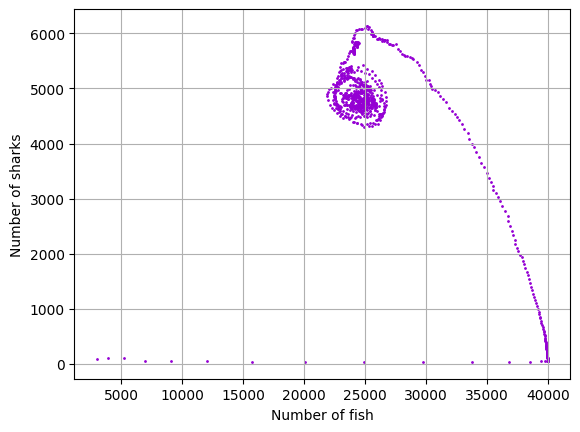

In [24]:
frames = [ocean]

no_fish = [fish_num]
no_sharks = [shark_num]
for t in range(time):
    if t % 40 == 0: print(str(t/4) + "%")

    # update sharks

    for s in sharks:
        old_pos = s.pos.copy()
        s.move()

        if s.alive == False:
            continue

        else:
            r = np.random.uniform(size = 1)
            if 1/shark_children_time > r:
                sharks.append(shark(old_pos))
       
    sharks = [s for s in sharks if s.alive == True]
    no_sharks.append(len(sharks))
    
    let_fish_swim_across_the_ocean()

    # add frame with fish and sharks

    no_fish.append(np.sum(ocean))
    new_ocean = ocean.copy()
    for s in sharks:
        new_ocean[s.pos[0], s.pos[1]] = -1
    frames.append(new_ocean)

plt.close()
plt.scatter(no_fish, no_sharks, s = 1, color = "darkviolet")
plt.xlabel("Number of fish")
plt.ylabel("Number of sharks")
plt.grid()
plt.show()

# Animation

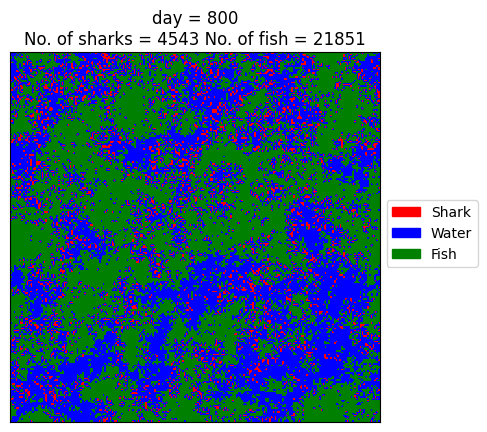

In [26]:
anime(frames[::4], "Lab13/big_lab_parameters.gif")

# Number of animals versus time

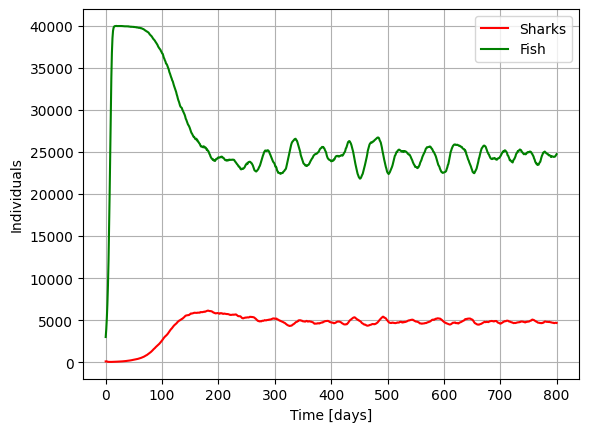

In [25]:
plt.plot(range(time + 1), no_sharks, color = "red")
plt.plot(range(time + 1), no_fish, color = "green")
plt.xlabel("Time [days]")
plt.ylabel("Individuals")
plt.legend(["Sharks", "Fish"], bbox_to_anchor = [1,1])
plt.grid()
plt.show()